<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 40px; text-indent: 230px">
            Metallic Glass Forming
        <p>    
    </body>
</html>

<img src="https://images11.popmeh.ru/upload/img_cache/46d/46ddfb4bdf7b8388fc6731df325bc524_ce_1500x800x0x70_cropped_666x444.webp" width=550/>

# Описание

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:500; font-size: 18px; text-indent: 50px" >
            Приведенная температура стеклования (Trg) - одна из характеристик, исторически использующаяся для грубой оценки стеклообразующей способности металлических сплавов (GFA).
        </p>    
        <p style = "font-family:Georgia, serif; font-weight:500; font-size: 18px; text-indent: 50px">
            В датасете содержится информация о составе материала (1). Во втором столбце отображен основной компонент сплава. В 4-23 столбцах даны значения, сгенерированные из столбца (1) "Material compositions", которые отображают свойства, усредненные по составу материала, а также характеристики, присущие только для основного элемента (отмечены как "site1").
        </p>    
        <p style = "font-family:Georgia, serif; font-weight:500; font-size: 18px; text-indent: 50px">
            Задача:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:500; font-size: 18px; text-indent: 50px">
            Построить модель для прогнозирования приведенной температуры стеклования (Trg).
        </p>
        <p style = "font-family:Georgia, serif; font-weight:500; font-size: 18px; text-indent: 50px">
            Создав модель для прогнозирования Trg для произвольного сплава, можно было бы использовать эти значения для прямой оценки GFA или в качестве входных данных для другой модели с целью последующего прогнозирования GFA.
        <p> 
    </body>
</html>

[Ссылка](https://www.kaggle.com/saurabhshahane/metallic-glass-forming) на датасет.

    0   Material compositions - состав сплава;
    1   main_element - основной элемент;
    2   Trg - приведенная температура стеклования;
    3   Density_composition_average - плотность сплава;
    4   IsBoron_composition_average - содержание бора;
    5   IsDBlock_composition_average - содержание элементов d-блока;
    6   IsTransitionMetal_composition_average - содержание переходных элементов;
    7   NdValence_composition_average - валентность d-элементов в сплаве (??);
    8   NValance_composition_average - валентность элементов в сплаве (??);
    9   HeatVaporization_max_value - теплота парообразования (испарения) - макс. значение;
    10  BoilingT_difference - температура кипения (разница, интервал??);
    11  HeatVaporization_difference - теплота парообразования (испарения) (разница, интервал??);
    12  MeltingT_difference - температура плавления (разница, интервал??);
    13  NdValence_difference - валентность d-элементов (разница, интервал??);
    14  NsUnfilled_difference - незаполненные орбитали (разница, интервал??);
    15  valence_difference - валентность (разница, интервал??);
    16  Site1_Density - плотность основного элемента;
    17  Site1_HeatCapacityMass - теплоемкость основного элемента;
    18  Site1_HeatFusion - теплота плавления основного элемента;
    19  Site1_IsDBlock - является ли основной элемент сплава элементом d-блока;
    20  Site1_IsTransitionMetal - является ли основной элемент сплава переходным металлом;
    21  Site1_NdValence - валентность d-элемента (??);
    22  Site1_SpecificHeatCapacity - удельная теплоемкость основного элемента;

# Импорт библиотек

In [1]:
random_state = 10

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_val_predict, \
    cross_validate, StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


import warnings
warnings.filterwarnings("ignore");

from tqdm import tqdm_notebook

# Загрузка датасета, краткое описание

In [2]:
df = pd.read_csv('../data/pet_project/Metal_Glass_Forming/Metallic_Glass_Forming_with_features.csv')

df.head()

,Material compositions,main_element,Trg,Density_composition_average,IsBoron_composition_average,IsDBlock_composition_average,IsTransitionMetal_composition_average,NdValence_composition_average,NValance_composition_average,HeatVaporization_max_value,...,NdValence_difference,NsUnfilled_difference,valence_difference,Site1_Density,Site1_HeatCapacityMass,Site1_HeatFusion,Site1_IsDBlock,Site1_IsTransitionMetal,Site1_NdValence,Site1_SpecificHeatCapacity
0,Ag10Cu35Zr55,Zr,0.534,0.579069,-0.5856,1.029882,1.029882,0.589536,0.217571,0.563915,...,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.31768,-0.884994
1,Ag10Cu50Zr40,Cu,0.608,0.748401,-0.5856,1.029882,1.029882,1.176250,0.653969,0.563915,...,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.31768,-0.884994
2,Ag10Cu55Zr35,Cu,0.609,0.804845,-0.5856,1.029882,1.029882,1.371822,0.799435,0.563915,...,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.31768,-0.884994
3,Ag20Cu40Zr40,Cu,0.577,0.821973,-0.5856,1.029882,1.029882,1.176250,0.653969,0.563915,...,0.473852,0.857849,0.264503,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.31768,-0.884994
4,Ag35Ca65,Ca,0.515,-0.860992,-0.5856,-0.998961,-0.998961,-0.437214,-0.613663,-1.684370,...,1.005911,0.857849,-1.745035,1.091651,-0.887077,-0.454471,0.718014,0.718014,1.31768,-0.884994


In [3]:
# Краткое описание датасета, типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Material compositions                  585 non-null    object 
 1   main_element                           585 non-null    object 
 2   Trg                                    585 non-null    float64
 3   Density_composition_average            585 non-null    float64
 4   IsBoron_composition_average            585 non-null    float64
 5   IsDBlock_composition_average           585 non-null    float64
 6   IsTransitionMetal_composition_average  585 non-null    float64
 7   NdValence_composition_average          585 non-null    float64
 8   NValance_composition_average           585 non-null    float64
 9   HeatVaporization_max_value             585 non-null    float64
 10  BoilingT_difference                    585 non-null    float64
 11  HeatVa

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 18px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
            1) Всего 585 позиций;
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
            2) 22 параметра;
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
            3) Параметры Material compositions, main_element типа object; остальные - числовые типа float.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
            4) Пропуски отсутствуют.
    </body>
</html>

In [4]:
# Проверка на наличие дубликатов
df.duplicated().sum()

0

# EDA

In [5]:
# Основные описательные статистики
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trg,585.0,5.773880e-01,0.048344,0.223000,0.557000,0.584000,0.609000,0.688000
Density_composition_average,585.0,1.709546e-12,1.000856,-2.296437,-0.658037,0.141297,0.491510,4.418691
IsBoron_composition_average,585.0,3.589778e-11,1.000856,-0.585600,-0.585600,-0.585600,0.204536,6.479041
IsDBlock_composition_average,585.0,1.367487e-11,1.000856,-2.091415,-1.155026,0.374410,0.826998,1.029882
IsTransitionMetal_composition_average,585.0,1.367487e-11,1.000856,-2.091415,-1.155026,0.374410,0.826998,1.029882
NdValence_composition_average,585.0,-2.735036e-11,1.000856,-2.148464,-0.843514,0.046825,0.785107,2.496357
NValance_composition_average,585.0,2.564103e-11,1.000856,-1.922857,-0.709255,0.055480,0.487722,6.272280
HeatVaporization_max_value,585.0,-1.709404e-10,1.000856,-2.436709,-0.740589,0.563915,0.563915,1.533032
BoilingT_difference,585.0,-4.444437e-11,1.000856,-2.118943,-0.522572,0.100611,0.438422,3.247621
HeatVaporization_difference,585.0,-4.273483e-11,1.000856,-1.844594,-0.785209,0.176059,0.505748,3.084747


In [6]:
# Основные описательные статистики
df.describe(include='object').T

,count,unique,top,freq
Material compositions,585,585,La62Al14Cu17Ag7,1
main_element,585,27,Cu,113


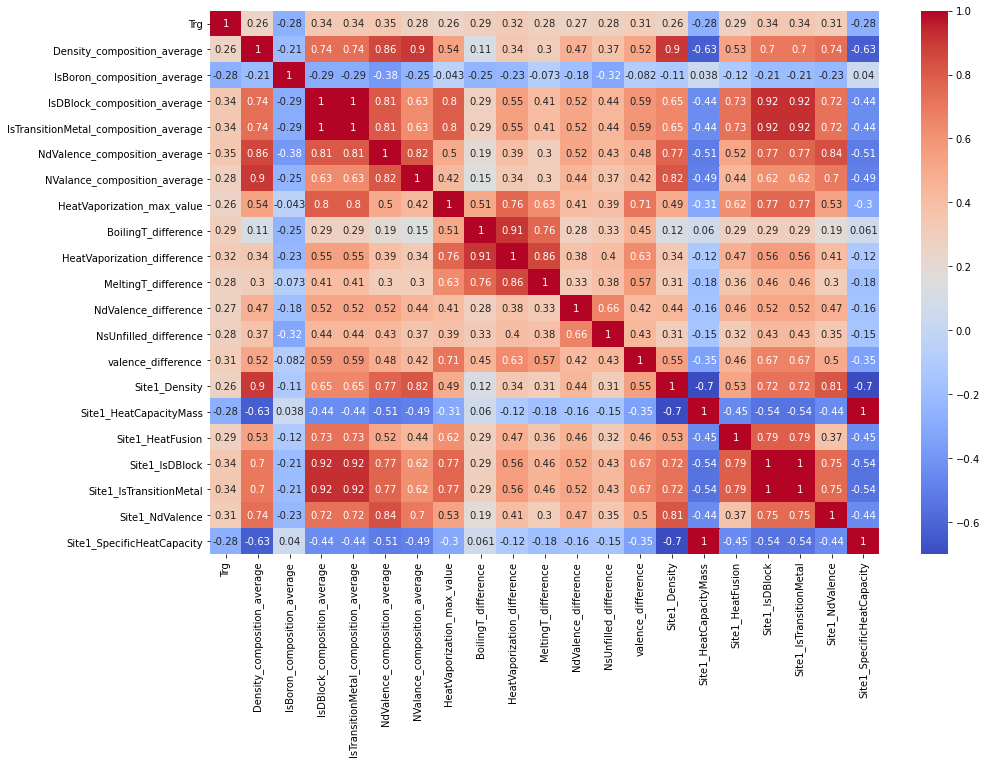

In [7]:
# Отображение heatmap корреляции
plt.figure(figsize= (15, 10))

sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2g', annot=True);

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 18px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
            Стандартное отклонение всех параметров равно 1, среднее значение равно 0. Значит перед нами масштабированные данные.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
           На карте корреляции, а также из описательных статистики видим коллинеарные параметры:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            1) IsDBlock_composition_average и IsTransitionMetal_composition_average;
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            2) Site1_IsDBlock и Site1_IsTransitionMetal;
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            3) Site1_HeatCapacityMass и Site1_SpecificHeatCapacity
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
           Точного описания параметров датасета не имеется, но, отталкиваясь от их названия:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
           Is DBlock и Is Transition composition average - средний состав элементов д-блока и переходных металлов. Но, элементы d-блока периодической системы - это и есть переходные элементы, поэтому параметры имеют одинаковые значения.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
           Параметры site1, насколько известно из описания к датасету, имеют отношение к основному элементу сплава. Поэтому исходя из названий параметров site1 Is DBlock и Is TransitionMetal можно сделать вывод, что параметры указывают на то, является ли основной элемент сплава элементом d-блока и переходным металлом. Но как указывалось выше, это одно и тоже.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
           Параметры site1 Heat Capacity Mass и Specific Heat Capacity - теплоемкость и удельная теплоемкость (отношение теплоемкости к массе). Ясно, что один параметр выражается из другого, поэтому они коллинеарны.

            
[D-элементы(1)](https://ru.wikipedia.org/wiki/D-%D1%8D%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D1%8B)  
[D-элементы(2)](https://chemistry.ru/course/content/chapter8/section/paragraph3/theory.html#.YeW7cO-OHMM)

In [8]:
# Удаление коллинеарных параметров
df = df.drop(['IsTransitionMetal_composition_average', 'Site1_IsTransitionMetal',
             'Site1_HeatCapacityMass'], axis=1)

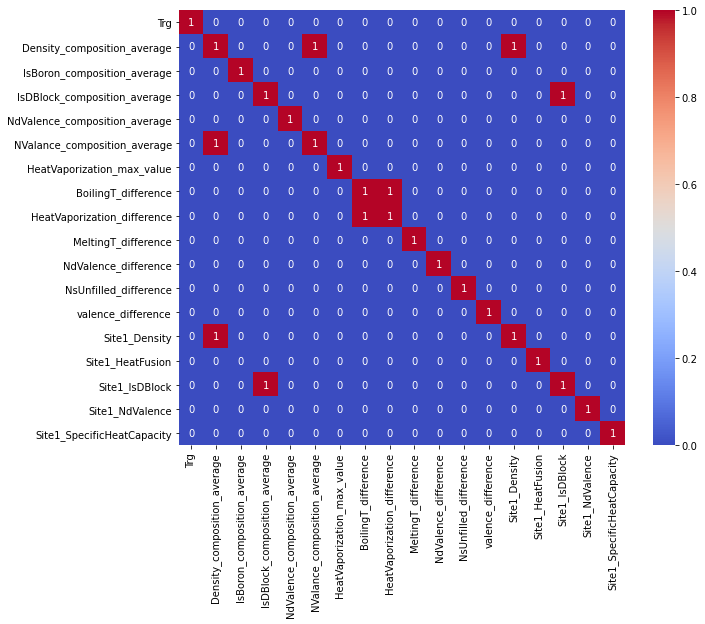

In [9]:
# Рассмотрение других сильно коррелирующих параметров
plt.figure(figsize= (10, 8))

sns.heatmap(df.corr() > 0.9, cmap='coolwarm', fmt='.2g', annot=True);

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
           Рассмотрим параметры:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            1) Density_composition_average и IsDblock_composition_average сильно коррелируют с Site1_Density, Site1_IsDblock соответственно. Ясно, что характеристики основного элемента сплава (плотность и отношение к элементам d-блока) напрямую связаны с характеристиками всего сплава.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            2) BoilingT_difference и HeatVaporization_difference. Теплота парообразования - величина, связанная с температурой кипения, т.е. это количество теплоты, которое необходимо подвести к веществу, взятому при температуре кипения;
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            3) Density_composition_average и Nvalence_composition_average. Известно, что увеличение валентности способствует увеличению плотности.

In [10]:
# Удалим сильно коррелирующие параметры
df = df.drop(['Site1_Density', 'Site1_IsDBlock', 'HeatVaporization_difference',
              'NValance_composition_average'], axis=1)

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px; text-indent: 50px">
            Значения приведенной температуры в подавляющем большинстве случаев находятся в диапазоне 0.45-0.65. Вызывает подозрение минимальное значение 0.223. Посмотрим, что это за сплав.
    </body>
</html>


In [11]:
df[df.Trg < 0.25]

,Material compositions,main_element,Trg,Density_composition_average,IsBoron_composition_average,IsDBlock_composition_average,NdValence_composition_average,HeatVaporization_max_value,BoilingT_difference,MeltingT_difference,NdValence_difference,NsUnfilled_difference,valence_difference,Site1_HeatFusion,Site1_NdValence,Site1_SpecificHeatCapacity
486,Ti40Zr10Cu34Pd16,Ti,0.223,0.418959,-0.5856,1.029882,0.785107,0.563915,-0.388423,-0.425353,0.473852,0.857849,0.264503,0.17329,-0.621547,0.180406


<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Посмотрим на значения Trg других сплавов на основе титана.
        </p>
    </body>
</html>

In [12]:
df[df.main_element == 'Ti']

,Material compositions,main_element,Trg,Density_composition_average,IsBoron_composition_average,IsDBlock_composition_average,NdValence_composition_average,HeatVaporization_max_value,BoilingT_difference,MeltingT_difference,NdValence_difference,NsUnfilled_difference,valence_difference,Site1_HeatFusion,Site1_NdValence,Site1_SpecificHeatCapacity
484,Ti40Zr10Cu30Pd20,Ti,0.537,0.477123,-0.585600,1.029882,0.785107,0.563915,-0.388423,-0.425353,0.473852,0.857849,0.264503,0.17329,-0.621547,0.180406
485,Ti40Zr10Cu32Pd18,Ti,0.537,0.448041,-0.585600,1.029882,0.785107,0.563915,-0.388423,-0.425353,0.473852,0.857849,0.264503,0.17329,-0.621547,0.180406
486,Ti40Zr10Cu34Pd16,Ti,0.223,0.418959,-0.585600,1.029882,0.785107,0.563915,-0.388423,-0.425353,0.473852,0.857849,0.264503,0.17329,-0.621547,0.180406
487,Ti40Zr10Cu36Pd14,Ti,0.562,0.389878,-0.585600,1.029882,0.785107,0.563915,-0.388423,-0.425353,0.473852,0.857849,0.264503,0.17329,-0.621547,0.180406
488,Ti40Zr10Cu38Pd12,Ti,0.560,0.360796,-0.585600,1.029882,0.785107,0.563915,-0.388423,-0.425353,0.473852,0.857849,0.264503,0.17329,-0.621547,0.180406
489,Ti40Zr10Cu40Pd10,Ti,0.557,0.331714,-0.585600,1.029882,0.785107,0.563915,-0.388423,-0.425353,0.473852,0.857849,0.264503,0.17329,-0.621547,0.180406
490,Ti40Zr25Ni8Cu9Be18,Ti,0.615,-0.579999,-0.585600,0.468049,-0.759907,0.563915,0.168905,-0.425353,1.005911,0.857849,0.264503,0.17329,-0.621547,0.180406
491,Ti41.5Zr2.5Hf5Cu37.5Ni7.5SiSn5,Ti,0.590,0.273784,-0.585600,0.842604,0.701989,1.030745,0.244516,1.475717,-1.654388,0.857849,0.264503,0.17329,-0.621547,0.180406
493,Ti42.5Zr2.5Hf5Cu42.5Ni7.5,Ti,0.563,0.321709,-0.585600,1.029882,0.711768,1.030745,-0.134760,0.158551,0.473852,0.857849,0.264503,0.17329,-0.621547,0.180406
494,Ti45Ni15Cu25Sn3Be7Zr5,Ti,0.595,-0.116109,-0.585600,0.717752,0.296179,0.563915,0.168905,0.891813,0.473852,0.857849,0.264503,0.17329,-0.621547,0.180406


<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Как видно, большинство значений Trg в диапазоне 0.5-0.63. Поэтому значение 0.223 - вероятнее всего опечатка.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            По данным источников 1, 2 значение Trg для сплава Ti40Zr10Cu34Pd16 равно 0,546.
        </p>
    </body>
</html>

[Источник 1](https://www.researchgate.net/profile/Long-Zhilin/publication/248179368_A_new_criterion_for_predicting_the_glass-forming_ability_of_bulk_metallic_glasses/links/5a7432ea0f7e9b20d490a969/A-new-criterion-for-predicting-the-glass-forming-ability-of-bulk-metallic-glasses.pdf)  
[Источник 2](https://ir.nsfc.gov.cn/paperDownload/1000000331918.pdf)

In [13]:
# Исправим значение
df.iloc[486, 2] = 0.546

In [14]:
df = df.drop('Material compositions', axis=1)

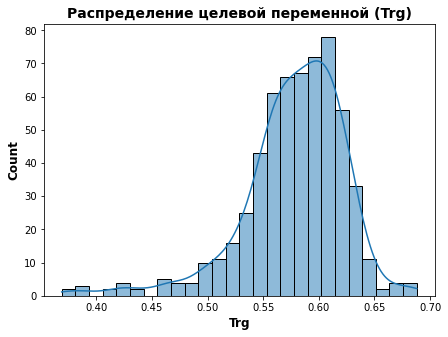

In [15]:
# Отображение распределения целевой переменной
plt.figure(figsize=(7,5))

ax = sns.histplot(df['Trg'], kde=True)
ax.set_xlabel('Trg', weight='bold', size=12)
ax.set_ylabel('Count', weight='bold', size=12)
ax.set_title('Распределение целевой переменной (Trg)', weight='bold', size=14)

plt.show()

In [16]:
# Проверка распределения на нормальность.
# H0 - целевая переменная имеет нормальное распределение
print(stats.shapiro(df.Trg));

ShapiroResult(statistic=0.9212132096290588, pvalue=6.350923336592696e-17)


<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Значение p-value намного ниже 0.05. Целевая переменная не имеет нормальное распределение.
        </p>
    </body>
</html>

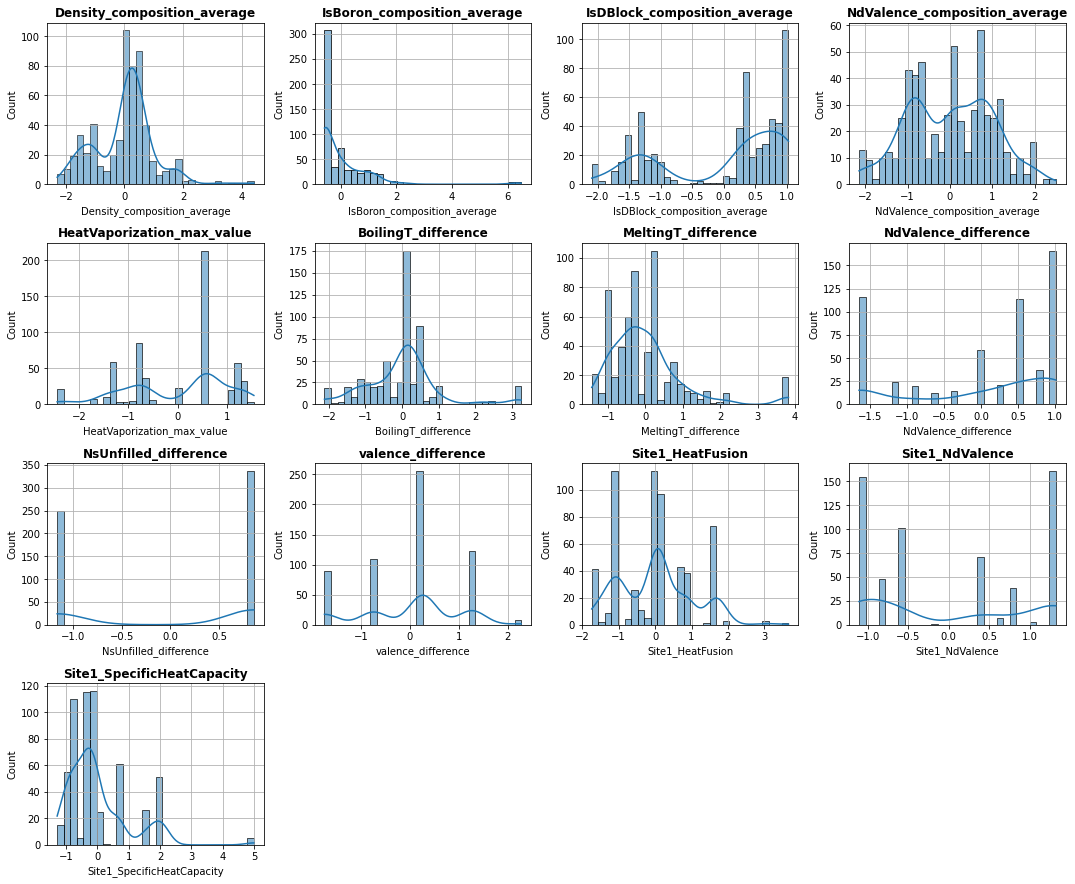

In [18]:
# Отображение распределений для всех параметров
def plot_hist(df, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(15,15))
    
    for i, param_name in enumerate(variables[2:]):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.histplot(df[param_name], ax=ax, kde=True, bins=30)
        ax.set_title(f"{param_name}", weight='bold')
        fig.tight_layout()
        plt.grid()
    
    plt.show()

plot_hist(df, df.columns, 5, 4)

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 18px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Параметры имеют различные виды распределений.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Часть параметров имеют бимодальные распределения.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Часть параметров - категориальные признаки. Присутствует 1 бинарный признак.
    </body>
</html>

In [19]:
# Вывод количества уникальных значений
df.nunique()

main_element                      27
Trg                              173
Density_composition_average      585
IsBoron_composition_average       63
IsDBlock_composition_average     123
NdValence_composition_average    299
HeatVaporization_max_value        25
BoilingT_difference               83
MeltingT_difference               87
NdValence_difference              11
NsUnfilled_difference              2
valence_difference                 5
Site1_HeatFusion                  30
Site1_NdValence                    9
Site1_SpecificHeatCapacity        27
dtype: int64

<html>
    <head>
        </head>
            <body>
            <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Прежде всего, приведенная температура стеклования - это отношение температуры стеклования к температуре плавления сплава. В свою очередь, температура стеклования и температура плавления - параметры зависящие от состава сплава. Также известно, что d-элементы в основной массе - тугоплавкие металлы.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Исходя из вышеизложенного, можно предположить, что такие параметры, как:  
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            - main_element, MeltingT_difference, Density_composition_average, IsDBlock_composition_average, valence_difference, NdValence_composition_average, NdValence_difference      
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            главным образом влияют на целевую переменную.           
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Расммотрим данные взаимосвязи.
    </body>
</html>

[Приведенная температура стеклования](http://udman.ru/ru/book/cpm/2018/4/598_Shilyaev.pdf)
[]()


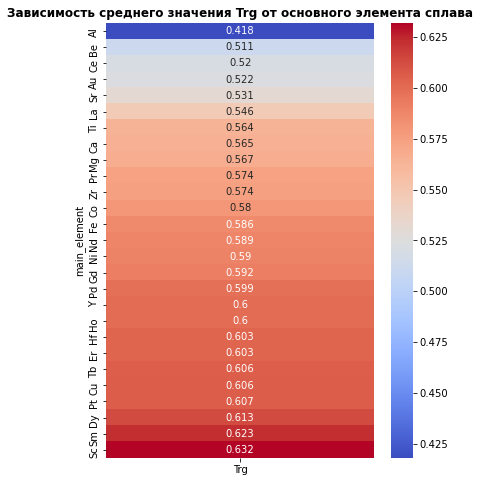

In [20]:
# Зависимость Trg от main_element
plt.figure(figsize=(6, 8))
sns.heatmap(df[['Trg', 'main_element']].groupby(['main_element']).mean().sort_values('Trg'),
            cmap = 'coolwarm', annot = True, fmt = '.3g')
plt.title('Зависимость среднего значения Trg от основного элемента сплава', weight='bold')
plt.show()

<html>
    <head>
        </head>
            <body>
            <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Видно, что среднее значение Trg значительно ниже у сплавов, основным элементом которых является Al (алюминий). И в целом видим, что среднее значение Trg зависит от основного элемента сплава.
    </body>
</html>

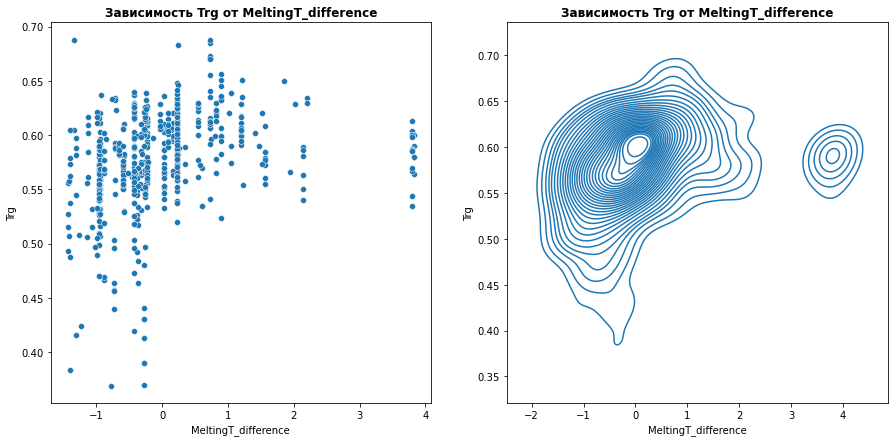

In [28]:
# Зависимость Trg от MeltingT_difference
fig, ax = plt.subplots(1,2, figsize=(15, 7))

ax[0].set_title('Зависимость Trg от MeltingT_difference', weight='bold')
sns.scatterplot(data=df, x='MeltingT_difference', y='Trg', ax=ax[0])

ax[1].set_title('Зависимость Trg от MeltingT_difference', weight='bold')
sns.kdeplot(data=df, x='MeltingT_difference', y='Trg', levels=30, ax=ax[1])

plt.show()

<html>
    <head>
        </head>
            <body>
            <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Какой-то явной линейной зависимости не наблюдается.
    </body>
</html>

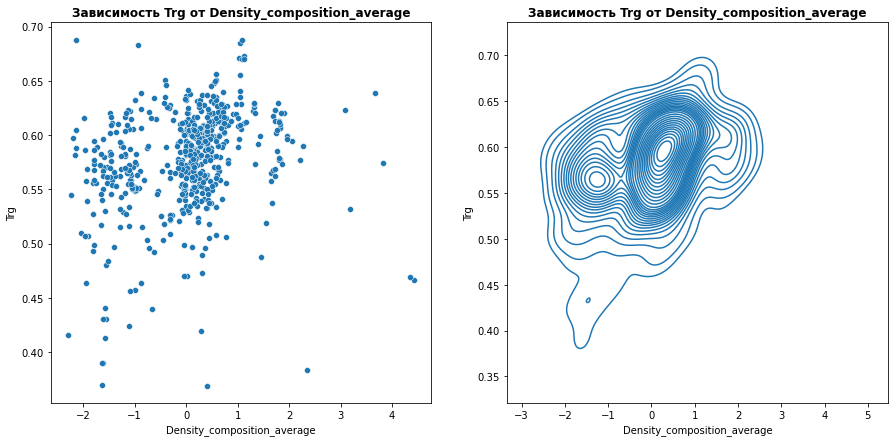

In [29]:
# Зависимость Trg от Density_composition_average
fig, ax = plt.subplots(1,2, figsize=(15, 7))

ax[0].set_title('Зависимость Trg от Density_composition_average', weight='bold')
sns.scatterplot(data=df, x='Density_composition_average', y='Trg', ax=ax[0])

ax[1].set_title('Зависимость Trg от Density_composition_average', weight='bold')
sns.kdeplot(data=df, x='Density_composition_average', y='Trg', levels=30, ax=ax[1])

plt.show()

<html>
    <head>
        </head>
            <body>
            <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Какой-то явной линейной зависимости также не наблюдается. Но, видно две группы. И заметно, что у одной группы значение Trg немного выше.
    </body>
</html>

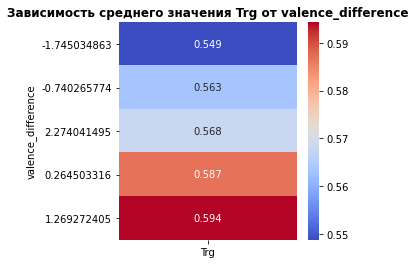

In [25]:
# Зависимость среднего значения Trg от valence_difference
plt.figure(figsize=(4, 4))
sns.heatmap(df[['Trg', 'valence_difference']].groupby(['valence_difference']).mean().sort_values('Trg'),
            cmap = 'coolwarm', annot = True, fmt = '.3g')
plt.title('Зависимость среднего значения Trg от valence_difference', weight='bold')
plt.show()

<html>
    <head>
        </head>
            <body>
            <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Есть небольшая разница в средних значениях Trg.
    </body>
</html>

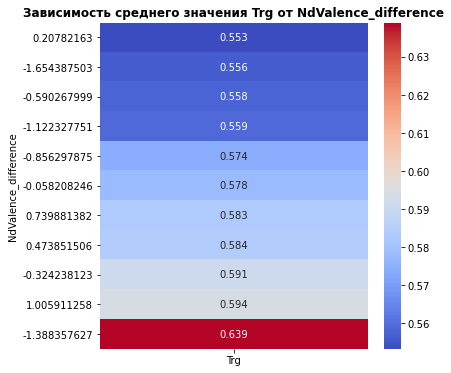

In [26]:
# Зависимость среднего значения Trg от Ndvalence_difference
plt.figure(figsize=(6, 6))
sns.heatmap(df[['Trg', 'NdValence_difference']].groupby(['NdValence_difference']).mean().sort_values('Trg'),
            cmap = 'coolwarm', annot = True, fmt = '.3g')
plt.title('Зависимость среднего значения Trg от NdValence_difference', weight='bold')
plt.show()

<html>
    <head>
        </head>
            <body>
            <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Видно, что среднее значение Trg значительно отличается.
    </body>
</html>

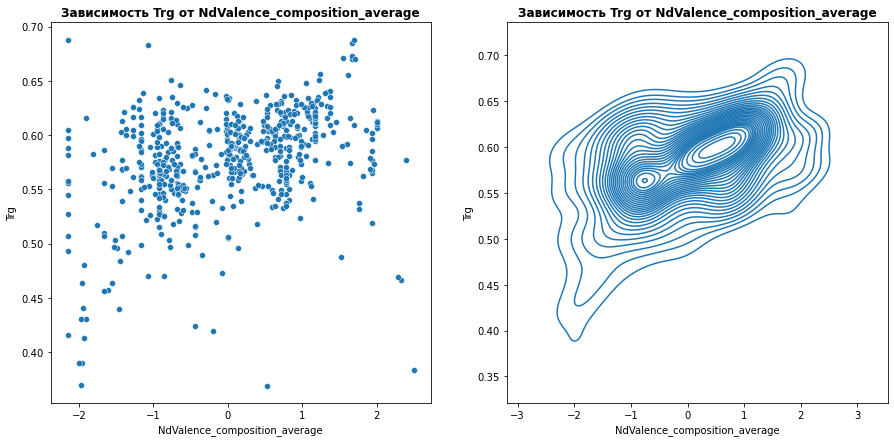

In [30]:
# Зависимость Trg от NdValence_composition_average
fig, ax = plt.subplots(1,2, figsize=(15, 7))

ax[0].set_title('Зависимость Trg от NdValence_composition_average', weight='bold')
sns.scatterplot(data=df, x='NdValence_composition_average', y='Trg', ax=ax[0])

ax[1].set_title('Зависимость Trg от NdValence_composition_average', weight='bold')
sns.kdeplot(data=df, x='NdValence_composition_average', y='Trg', levels=30, ax=ax[1])

plt.show()

<html>
    <head>
        </head>
            <body>
            <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Какой-то явной линейной зависимости также не наблюдается. Но тоже, выделяются 2 группы. И тоже заметно, что у одной группы значение Trg немного выше.
    </body>
</html>

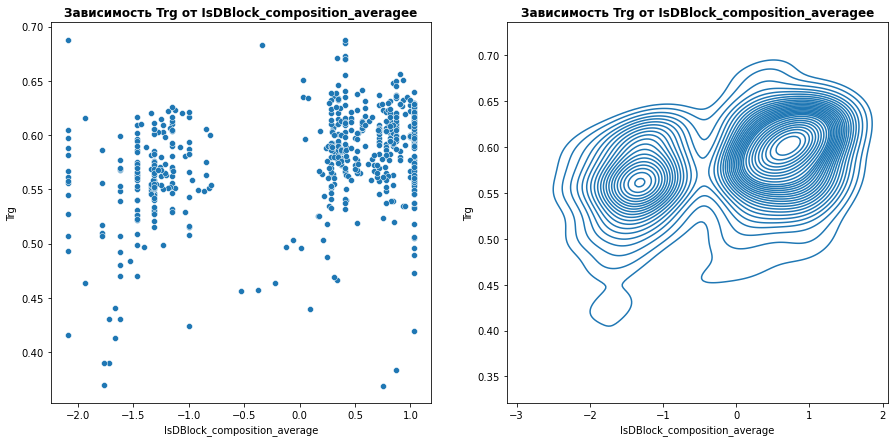

In [31]:
# Зависимость Trg от IsDBlock_composition_averagee
fig, ax = plt.subplots(1,2, figsize=(15, 7))

ax[0].set_title('Зависимость Trg от IsDBlock_composition_averagee', weight='bold')
sns.scatterplot(data=df, x='IsDBlock_composition_average', y='Trg', ax=ax[0])

ax[1].set_title('Зависимость Trg от IsDBlock_composition_averagee', weight='bold')
sns.kdeplot(data=df, x='IsDBlock_composition_average', y='Trg', levels=30, ax=ax[1])

plt.show()

<html>
    <head>
        </head>
            <body>
            <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Тоже заметно, что у одной группы значение Trg выше.
    </body>
</html>

<html>
    <head>
        </head>
            <body>
            <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Вывод:
            <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Из рассмотренных выше параметров наиболее выделяются main_element, NdValence, Density_composition_average, IsDBlock_composition_averagee.
    </body>
</html>

# Построение моделей

In [36]:
# Бинаризация
df = pd.get_dummies(df, columns=['main_element'])

In [37]:
# Разбивка данных на train/test, стандартизация
X = df.drop('Trg', axis=1)
y = df['Trg'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=random_state)

st = StandardScaler()

X_train_std = st.fit_transform(X_train)
X_test_std = st.transform(X_test)

In [38]:
# Функция для расчета коэффициента детерминации
def r2_adjusted(y_true: list, y_pred: list, X_test: np.array) -> float:
    N_objects = len(y_true)
    N_features = X_test.shape[1]
    r2_ = r2_score(y_true, y_pred)
    return 1 - (1 - r2_) * (N_objects - 1) / (N_objects - N_features - 1)

In [39]:
# Функция для расчета ошибок

def get_errors(y_test, y_pred):
    mse = round(mean_squared_error(y_test, y_pred), 5)
    rmse = round(np.sqrt(mse), 5)
    mae = round(mean_absolute_error(y_test, y_pred), 5)
    mape = round(np.mean(np.abs((y_test - y_pred) / y_test)) * 100, 2)
    wape = round((np.sum(abs(y_test - y_pred)) / np.sum(y_test)) * 100 , 2)
    r2 = round(r2_adjusted(y_test, y_pred, X_test), 2)
    return mse, rmse, mae, mape, wape, r2

In [40]:
# Фрейм для расчетных значений ошибок
index = ['MSE', 'RMSE', 'MAE', 'MAPE, %', 'WAPE, %', 'R2']
errors = pd.DataFrame(index=index)

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Попробуем построить собственные модели линейной регрессии при помощи градиентного спуска и стохастического градиентного спуска.
    </body>
</html>

## LinearRegression (Stochastic Gradient Descent)

In [47]:
class SGDLinearRegression:
    def __init__(self, eta: float = 0.01, eps: float = 0.05, iters: int = 1000):
        """
        Стохастический градиентный спуск
        :param eta: скорость обучения (learning rate), по умолчанию = 0.01
        :param eps: критерий останова, по умолчанию равен = 0.05
        :param iters: максимальное количество итераций, по умолчанию = 1000
        """
        self.eta = eta
        self.eps = eps
        self.iters = iters

    def mean_squared_error(self, y: float, y_pred: float):
        """
        Вычисление Среднеквадратичной ошибки (MSE)
        :param y: фактическое значение y
        :param y_pred: расчетное значение y
        :return: значение MSE
        """
        error = (y - y_pred)
        return error ** 2

    def predict(self, X: pd.DataFrame):
        """
        Получение вектора весов
        :param X: вектор признаков
        :return: вектор весов
        """
        return self.w0 + np.dot(X, self.wx)

    def sample_element(self, X: pd.DataFrame, y: np.ndarray):
        """
        Выбор случайного элемента

        :param X: вектор признаков
        :param y: вектор ответов
        :return: случайные элементы X и y
        """
        ind = np.random.randint(X.shape[0])
        return X[ind, :], y[ind]

    def fit(self, X: pd.DataFrame, y: np.ndarray):
        """
        Обучение модели
        :param X: вектор признаков
        :param y: вектор ответов
        :return: None
        """

        # Начальные вектора весов
        self.w0 = np.array(0.0)
        self.wx = np.zeros(X.shape[1])

        # Список с ошибками и итерациями
        self.errors_ = []
        self.count_iters = []

        # Цикл
        for i in range(1, self.iters + 1):

            # Обновление весов
            w0_pred = self.w0.copy()
            wx_pred = self.wx.copy()

            # Выбор элемента
            X_sample, y_sample = self.sample_element(X, y)

            # Вычисление вектора ответа
            y_pred = self.predict(X_sample)

            # Вычисление разницы между y и y_pred
            diff = y_sample - y_pred

            # Вычисление градиентов весов w0 и wx
            gradient_w0 = -2 * diff
            gradient_wx = -2 * np.dot(X_sample, diff)

            # Вычисление весов w0 и wx
            self.w0 -= self.eta * gradient_w0
            self.wx -= self.eta * gradient_wx

            # Вычисление mse
            error_ = self.mean_squared_error(y_sample, y_pred)

            # Добавление ошибки и номера итерации в списки
            self.errors_.append(error_)
            self.count_iters.append(i)

            # Разница весов в переменные (для компактности условия останова)
            check_w0 = abs(self.w0 - w0_pred)
            check_wx = abs(np.mean(self.wx - wx_pred))

            # Остановка цикла, если выполняется условие
            if check_w0 < self.eps and check_wx < self.eps:
                break

        return self

In [51]:
# Обучение модели
sgd = SGDLinearRegression(eta=0.002, eps=0.0000001, iters=2000)
sgd.fit(X_train_std, y_train);

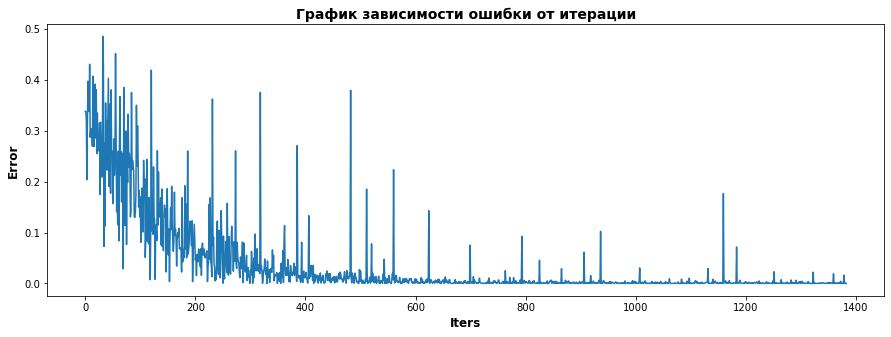

In [52]:
# Отображение графика зависимости ошибки от итерации
plt.figure(figsize = (15, 5))

y_n = sgd.errors_

plt.plot(y_n)

plt.title('График зависимости ошибки от итерации', weight='bold', size=14)
plt.xlabel('Iters', weight='bold', size=12)
plt.ylabel('Error', weight='bold', size=12)

plt.show()

In [53]:
y_pred = sgd.predict(X_test_std)

errors['LR_SGD'] = get_errors(y_test, y_pred)

errors

,LR_SGD
MSE,0.00180
RMSE,0.04243
MAE,0.02969
"MAPE, %",5.15000
"WAPE, %",5.13000
R2,-0.39000


## LinearRegression (Gradient Descent)

In [57]:
class GDLinearRegression:
    def __init__(self, eta: float = 0.01, eps: float = 0.05, iters: int = 100):
        """
        Градиентный спуск
        :param eta: скорость обучения (learning rate), по умолчанию = 0.01
        :param eps: критерий останова, по умолчанию равен = 0.05
        :param iters: максимальное количество итераций, по умолчанию = 100
        """
        self.eta = eta
        self.eps = eps
        self.iters = iters

    def mean_squared_error(self, y: list, y_pred: list):
        """
        Вычисление среднеквадратичной ошибки (MSE)
        :param y: фактически значения ответов
        :param y_pred: расчетные значения ответов
        :return: значение MSE
        """
        error = y - y_pred
        return np.sum(error ** 2) / y.shape[0]

    def predict(self, X: pd.DataFrame):
        """
        Расчет вектора весов
        :param X: вектор признаков
        :return: вектор весов
        """
        return self.w0 + np.dot(X, self.wx)

    def fit(self, X: pd.DataFrame, y: list):
        """
        Обучение модели
        :param X: вектор весов
        :param y: вектор ответов
        :return: None
        """
        # Начальные вектора весов
        self.w0 = np.array(0.0)
        self.wx = np.zeros(X.shape[1])

        # Список с ошибками и итерациями
        self.errors_ = []
        self.count_iters = []

        for i in range(1, self.iters + 1):
            # Обновление весов
            w0_pred = self.w0.copy()
            wx_pred = self.wx.copy()

            # Вычисление вектора ответа
            y_pred = self.predict(X)

            # Вычисление разницы между y и y_pred
            diff = y - y_pred

            # Вычисление градиентов весов w0 и wx
            gradient_w0 = (-2 / X.shape[0]) * np.sum(diff)
            gradient_wx = (-2 / X.shape[0]) * np.dot(X.T, diff)

            # Вычисление весов w0 и wx
            self.w0 -= self.eta * gradient_w0
            self.wx -= self.eta * gradient_wx

            # Вычисление mse
            error_ = self.mean_squared_error(y, y_pred)

            # Добавление ошибки и номера итерации в списки
            self.errors_.append(error_)
            self.count_iters.append(i)

            # Разница весов в переменные (для компактности условия останова)
            check_w0 = abs(self.w0 - w0_pred)
            check_wx = abs(np.mean(self.wx - wx_pred))

            # Остановка цикла, если выполняется условие
            if check_w0 < self.eps and check_wx < self.eps:
                break

        return self

In [58]:
# Обучение модели
gd = GDLinearRegression(eta=0.05, eps=0.000001, iters=200)
gd.fit(X_train_std, y_train);

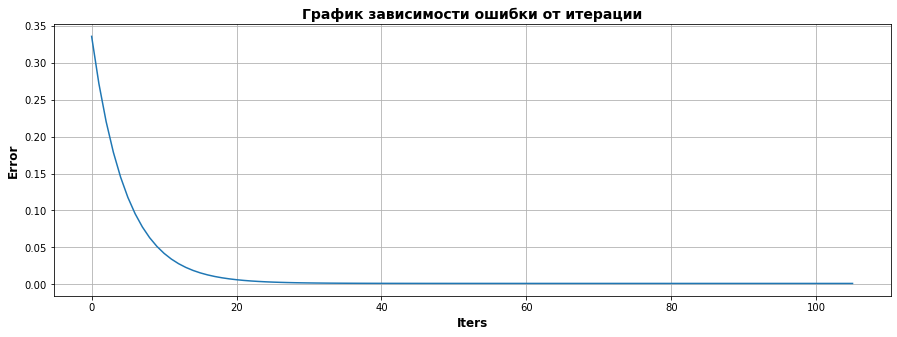

In [59]:
plt.figure(figsize = (15, 5))

y_n = gd.errors_

plt.plot(y_n)

plt.title('График зависимости ошибки от итерации', weight='bold', size=14)
plt.xlabel('Iters', weight='bold', size=12)
plt.ylabel('Error', weight='bold', size=12)
plt.grid()

plt.show()

In [60]:
y_pred = gd.predict(X_test_std)

errors['LR_GD'] = get_errors(y_test, y_pred)

errors

,LR_SGD,LR_GD
MSE,0.00180,0.00100
RMSE,0.04243,0.03162
MAE,0.02969,0.02469
"MAPE, %",5.15000,4.33000
"WAPE, %",5.13000,4.26000
R2,-0.39000,0.23000


<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 18px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 18px">
            Обычный градиентный спуск показал лучший результат. Это видно по значению ошибок, а также по коэффициенту детерминации. Посмотрим на другие алгоритмы.
    </body>
</html>

## LinearRegression (sklearn)

In [61]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)

In [62]:
errors['LR_skl'] = get_errors(y_test, y_pred)

errors

,LR_SGD,LR_GD,LR_skl
MSE,0.00180,0.00100,0.00102
RMSE,0.04243,0.03162,0.03194
MAE,0.02969,0.02469,0.02504
"MAPE, %",5.15000,4.33000,4.38000
"WAPE, %",5.13000,4.26000,4.32000
R2,-0.39000,0.23000,0.21000


<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 14px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Результат хуже по сравнению с "собственным" алгоритмом градиентного спуска по всем метрикам.
    </body>
</html>

##  Ridge, Lasso и ElasticNet

In [63]:
rg = Ridge()
ls = Lasso()
el = ElasticNet()

r_models = [rg, ls, el]

In [64]:
r_errors = pd.DataFrame()

for m in tqdm_notebook(r_models):
    m.fit(X_train_std, y_train)
    y_pred = m.predict(X_test_std)

    r_errors = r_errors.append([get_errors(y_test, y_pred)])

r_errors.columns = ['MSE', 'RMSE', 'MAE', 'MAPE, %', 'WAPE, %', 'R2']
r_errors.index = ['Ridge', 'Lasso', 'ElNet']
r_errors = r_errors.T

  0%|          | 0/3 [00:00<?, ?it/s]

In [65]:
errors_res = pd.concat([errors, r_errors], axis=1, ignore_index=False)
errors_res

,LR_SGD,LR_GD,LR_skl,Ridge,Lasso,ElNet
MSE,0.00180,0.00100,0.00102,0.00101,0.00178,0.00178
RMSE,0.04243,0.03162,0.03194,0.03178,0.04219,0.04219
MAE,0.02969,0.02469,0.02504,0.02493,0.03290,0.03290
"MAPE, %",5.15000,4.33000,4.38000,4.36000,5.87000,5.87000
"WAPE, %",5.13000,4.26000,4.32000,4.30000,5.68000,5.68000
R2,-0.39000,0.23000,0.21000,0.22000,-0.38000,-0.38000


In [66]:
errors_res[:-1].style.highlight_min(color='lightgreen', axis=1)

,LR_SGD,LR_GD,LR_skl,Ridge,Lasso,ElNet
MSE,0.001800,0.001000,0.001020,0.001010,0.001780,0.001780
RMSE,0.042430,0.031620,0.031940,0.031780,0.042190,0.042190
MAE,0.029690,0.024690,0.025040,0.024930,0.032900,0.032900
"MAPE, %",5.150000,4.330000,4.380000,4.360000,5.870000,5.870000
"WAPE, %",5.130000,4.260000,4.320000,4.300000,5.680000,5.680000


<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 14px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            "Собственный" алгоритм градиентного спуска показывает немного лучший результат. Посмотрим, можно ли улучшить Ridge алгоритм.
    </body>
</html>

### Ridge (alpha)

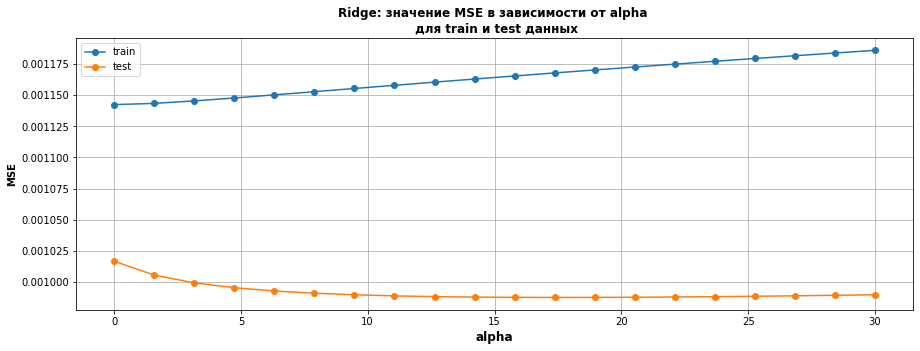

In [67]:
# Рассмотрение зависимости MSE от alpha
def get_score_model(clf, X, y):
    score = clf.predict(X)
    return mean_squared_error(y, score)

train_scores, test_scores = [], []
values = np.linspace(0.001, 30.0, num=20)
            
for num, i in enumerate(values):
    model = Ridge(alpha=i)
    model.fit(X_train_std, y_train)
    
    train_ = get_score_model(model, X_train_std, y_train)
    train_scores.append(train_)
    
    test_ = get_score_model(model, X_test_std, y_test)
    test_scores.append(test_)

plt.figure(figsize=(15, 5))
plt.plot(values, train_scores, '-o', label='train')
plt.plot(values, test_scores, '-o', label='test')
plt.xlabel('alpha', weight='bold', size=12)
plt.ylabel('MSE', weight='bold')
plt.title('Ridge: значение MSE в зависимости от alpha \n для train и test данных', weight='bold')
plt.grid()
plt.legend()
plt.show()

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 14px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            При значении alpha от 10  до 20 значение MSE  практически не изменяется, выше 20 - начинает увеличиваться.
    </body>
</html>

In [68]:
rg = Ridge(alpha=11.0)
rg.fit(X_train_std, y_train)
y_pred = rg.predict(X_test_std)

errors_res['Ridge_alp'] = get_errors(y_test, y_pred)
errors_res

,LR_SGD,LR_GD,LR_skl,Ridge,Lasso,ElNet,Ridge_alp
MSE,0.00180,0.00100,0.00102,0.00101,0.00178,0.00178,0.00099
RMSE,0.04243,0.03162,0.03194,0.03178,0.04219,0.04219,0.03146
MAE,0.02969,0.02469,0.02504,0.02493,0.03290,0.03290,0.02459
"MAPE, %",5.15000,4.33000,4.38000,4.36000,5.87000,5.87000,4.31000
"WAPE, %",5.13000,4.26000,4.32000,4.30000,5.68000,5.68000,4.24000
R2,-0.39000,0.23000,0.21000,0.22000,-0.38000,-0.38000,0.24000


In [69]:
errors_res[:-1].style.highlight_min(color='lightgreen', axis=1)

,LR_SGD,LR_GD,LR_skl,Ridge,Lasso,ElNet,Ridge_alp
MSE,0.001800,0.001000,0.001020,0.001010,0.001780,0.001780,0.000990
RMSE,0.042430,0.031620,0.031940,0.031780,0.042190,0.042190,0.031460
MAE,0.029690,0.024690,0.025040,0.024930,0.032900,0.032900,0.024590
"MAPE, %",5.150000,4.330000,4.380000,4.360000,5.870000,5.870000,4.310000
"WAPE, %",5.130000,4.260000,4.320000,4.300000,5.680000,5.680000,4.240000


<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 14px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Показатели работы алгоритма Ridge улучшены по всем метрикам. Посмотрим на деревья решений.
    </body>
</html>

In [70]:
# Наиболее значимые параметры
perm = PermutationImportance(rg, random_state=1).fit(X_train_std, y_train)

eli5.show_weights(perm, feature_names=X_train.columns.tolist())

Weight,Feature
0.6051 ± 0.0491,main_element_Al
0.2041 ± 0.0460,IsBoron_composition_average
0.1571 ± 0.0251,Site1_SpecificHeatCapacity
0.1034 ± 0.0151,main_element_Cu
0.0802 ± 0.0249,Density_composition_average
0.0631 ± 0.0117,IsDBlock_composition_average
0.0546 ± 0.0128,main_element_Pd
0.0541 ± 0.0214,main_element_La
0.0387 ± 0.0122,main_element_Zr
0.0368 ± 0.0092,Site1_NdValence


## Деревья решений

### Baseline

In [71]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

errors_res['DTR_BL'] = get_errors(y_test, y_pred)

errors_res

,LR_SGD,LR_GD,LR_skl,Ridge,Lasso,ElNet,Ridge_alp,DTR_BL
MSE,0.00180,0.00100,0.00102,0.00101,0.00178,0.00178,0.00099,0.00103
RMSE,0.04243,0.03162,0.03194,0.03178,0.04219,0.04219,0.03146,0.03209
MAE,0.02969,0.02469,0.02504,0.02493,0.03290,0.03290,0.02459,0.02316
"MAPE, %",5.15000,4.33000,4.38000,4.36000,5.87000,5.87000,4.31000,4.11000
"WAPE, %",5.13000,4.26000,4.32000,4.30000,5.68000,5.68000,4.24000,4.00000
R2,-0.39000,0.23000,0.21000,0.22000,-0.38000,-0.38000,0.24000,0.20000


In [72]:
errors_res[:-1].style.highlight_min(color='lightgreen', axis=1)

,LR_SGD,LR_GD,LR_skl,Ridge,Lasso,ElNet,Ridge_alp,DTR_BL
MSE,0.001800,0.001000,0.001020,0.001010,0.001780,0.001780,0.000990,0.001030
RMSE,0.042430,0.031620,0.031940,0.031780,0.042190,0.042190,0.031460,0.032090
MAE,0.029690,0.024690,0.025040,0.024930,0.032900,0.032900,0.024590,0.023160
"MAPE, %",5.150000,4.330000,4.380000,4.360000,5.870000,5.870000,4.310000,4.110000
"WAPE, %",5.130000,4.260000,4.320000,4.300000,5.680000,5.680000,4.240000,4.000000


<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 14px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            По некоторым метрикам данный алгоритм лучше. Воспользуемся поиском по сетке.
    </body>
</html>

### Подбор параметров, Gridsearch

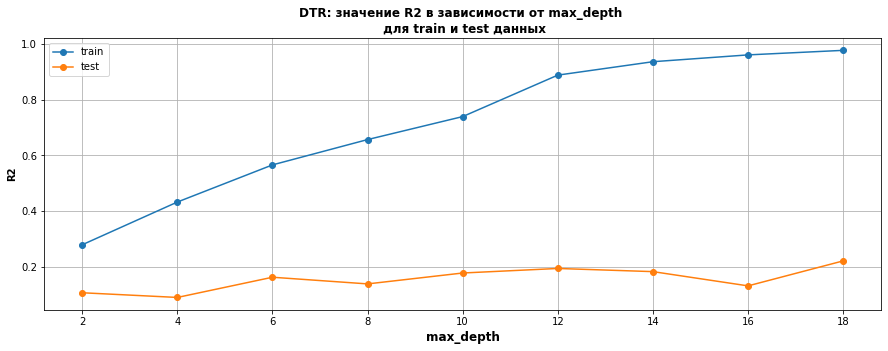

In [73]:
# max_depth [6, 12, 14, 18]
def get_score_model_(clf, X, y):
    score = clf.predict(X)
    return r2_adjusted(y, score, X)

param = 'max_depth'
train_scores, test_scores = [], []
values = np.arange(2, 20, 2)
            
for num, i in enumerate(values):
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    
    train_ = get_score_model_(model, X_train, y_train)
    train_scores.append(train_)
    
    test_ = get_score_model_(model, X_test, y_test)
    test_scores.append(test_)

plt.figure(figsize=(15, 5))
plt.plot(values, train_scores, '-o', label='train')
plt.plot(values, test_scores, '-o', label='test')
plt.xlabel(param, weight='bold', size=12)
plt.ylabel('R2', weight='bold')
plt.title(f"DTR: значение R2 в зависимости от {param} \n для train и test данных", weight='bold')
plt.grid()
plt.legend()
plt.show()

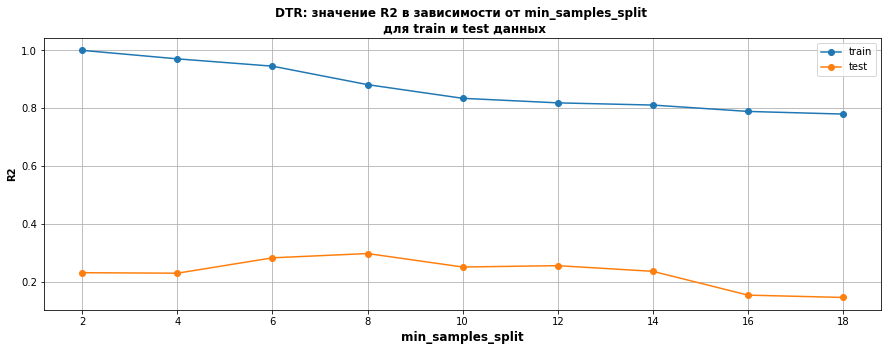

In [74]:
# min_samples_split [6, 8, 10]

param = 'min_samples_split'
train_scores, test_scores = [], []
values = np.arange(2, 20, 2)
            
for num, i in enumerate(values):
    model = DecisionTreeRegressor(min_samples_split=i)
    model.fit(X_train, y_train)
    
    train_ = get_score_model_(model, X_train, y_train)
    train_scores.append(train_)
    
    test_ = get_score_model_(model, X_test, y_test)
    test_scores.append(test_)

plt.figure(figsize=(15, 5))
plt.plot(values, train_scores, '-o', label='train')
plt.plot(values, test_scores, '-o', label='test')
plt.xlabel(param, weight='bold', size=12)
plt.ylabel('R2', weight='bold')
plt.title(f"DTR: значение R2 в зависимости от {param} \n для train и test данных", weight='bold')
plt.grid()
plt.legend()
plt.show()

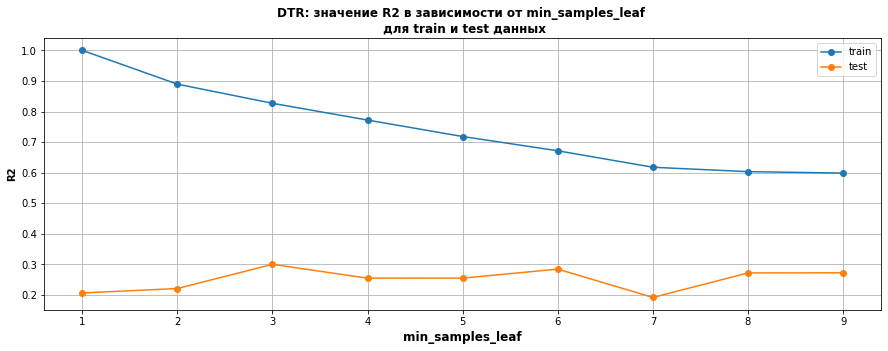

In [75]:
# min_samples_leaf [3, 6, 8]

param = 'min_samples_leaf'
train_scores, test_scores = [], []
values = np.arange(1, 10)
            
for num, i in enumerate(values):
    model = DecisionTreeRegressor(min_samples_leaf=i)
    model.fit(X_train, y_train)
    
    train_ = get_score_model_(model, X_train, y_train)
    train_scores.append(train_)
    
    test_ = get_score_model_(model, X_test, y_test)
    test_scores.append(test_)

plt.figure(figsize=(15, 5))
plt.plot(values, train_scores, '-o', label='train')
plt.plot(values, test_scores, '-o', label='test')
plt.xlabel(param, weight='bold', size=12)
plt.ylabel('R2', weight='bold')
plt.title(f"DTR: значение R2 в зависимости от {param} \n для train и test данных", weight='bold')
plt.grid()
plt.legend()
plt.show()

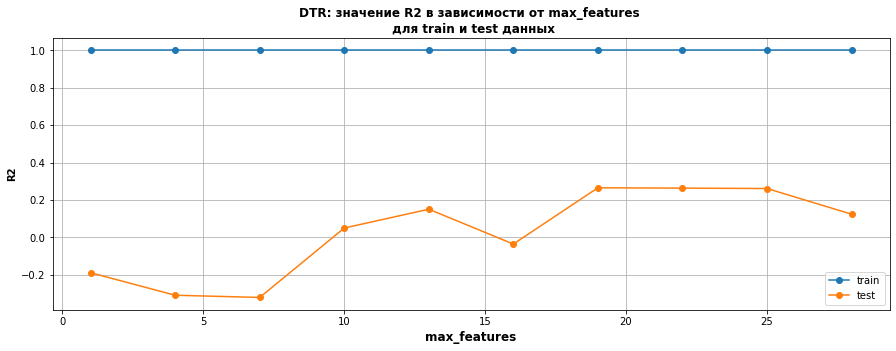

In [76]:
# max_features [6, 11, 16]

param = 'max_features'
train_scores, test_scores = [], []
values = np.arange(1, 30, 3)
            
for num, i in enumerate(values):
    model = DecisionTreeRegressor(max_features=i)
    model.fit(X_train, y_train)
    
    train_ = get_score_model_(model, X_train, y_train)
    train_scores.append(train_)
    
    test_ = get_score_model_(model, X_test, y_test)
    test_scores.append(test_)

plt.figure(figsize=(15, 5))
plt.plot(values, train_scores, '-o', label='train')
plt.plot(values, test_scores, '-o', label='test')
plt.xlabel(param, weight='bold', size=12)
plt.ylabel('R2', weight='bold')
plt.title(f"DTR: значение R2 в зависимости от {param} \n для train и test данных", weight='bold')
plt.grid()
plt.legend()
plt.show()

In [83]:
params = {
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'splitter' : ['best', 'random'],
    'max_depth': [6, 12, 14, 18],
    'min_samples_split': [6, 8, 10],
    'min_samples_leaf': [3, 6, 8],
    'max_features': [20, 25, None, 'auto']
}

dtr = DecisionTreeRegressor()

grid_sr = GridSearchCV(dtr, params, cv=3, verbose=1)

In [84]:
%%time
grid_sr.fit(X_train, y_train)
grid_sr.best_params_

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits
CPU times: user 1min 1s, sys: 181 ms, total: 1min 1s
Wall time: 1min 3s


{'criterion': 'friedman_mse',
 'max_depth': 18,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'splitter': 'random'}

In [85]:
model_gs = grid_sr.best_estimator_
model_gs.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=18,
                      max_features='auto', min_samples_leaf=3,
                      min_samples_split=6, splitter='random')

In [86]:
y_pred = model_gs.predict(X_test)

errors_res['DTR_GS'] = get_errors(y_test, y_pred)
errors_res

,LR_SGD,LR_GD,LR_skl,Ridge,Lasso,ElNet,Ridge_alp,DTR_BL,DTR_GS
MSE,0.00180,0.00100,0.00102,0.00101,0.00178,0.00178,0.00099,0.00103,0.00092
RMSE,0.04243,0.03162,0.03194,0.03178,0.04219,0.04219,0.03146,0.03209,0.03033
MAE,0.02969,0.02469,0.02504,0.02493,0.03290,0.03290,0.02459,0.02316,0.02207
"MAPE, %",5.15000,4.33000,4.38000,4.36000,5.87000,5.87000,4.31000,4.11000,3.91000
"WAPE, %",5.13000,4.26000,4.32000,4.30000,5.68000,5.68000,4.24000,4.00000,3.81000
R2,-0.39000,0.23000,0.21000,0.22000,-0.38000,-0.38000,0.24000,0.20000,0.29000


In [87]:
errors_res[:-1].style.highlight_min(color='lightgreen', axis=1)

,LR_SGD,LR_GD,LR_skl,Ridge,Lasso,ElNet,Ridge_alp,DTR_BL,DTR_GS
MSE,0.001800,0.001000,0.001020,0.001010,0.001780,0.001780,0.000990,0.001030,0.000920
RMSE,0.042430,0.031620,0.031940,0.031780,0.042190,0.042190,0.031460,0.032090,0.030330
MAE,0.029690,0.024690,0.025040,0.024930,0.032900,0.032900,0.024590,0.023160,0.022070
"MAPE, %",5.150000,4.330000,4.380000,4.360000,5.870000,5.870000,4.310000,4.110000,3.910000
"WAPE, %",5.130000,4.260000,4.320000,4.300000,5.680000,5.680000,4.240000,4.000000,3.810000


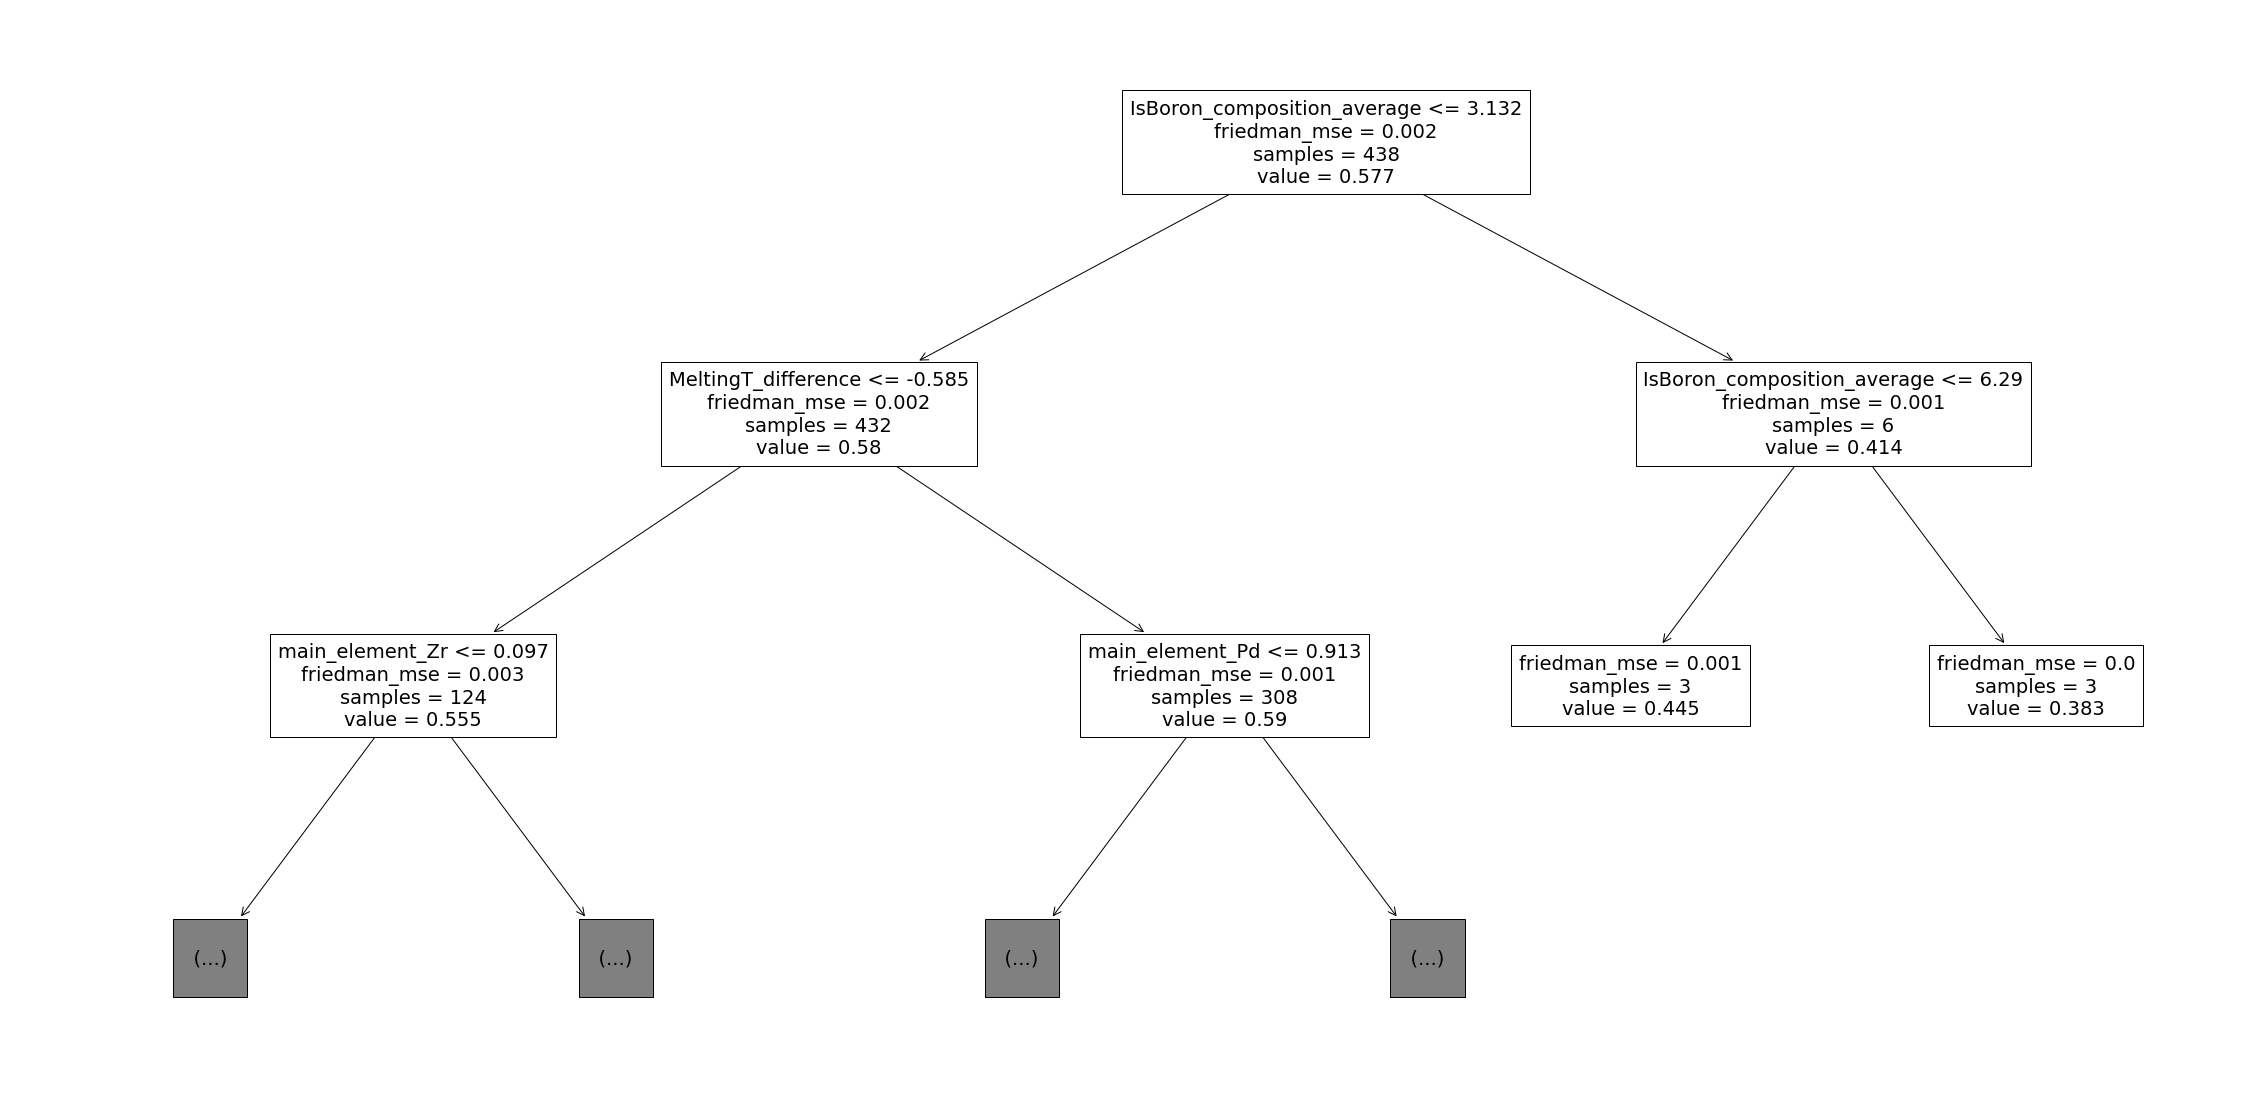

In [88]:
# Отображение дерева (начало)
plt.figure(figsize=(40, 20))
_ = tree.plot_tree(model_gs, feature_names = X.columns, max_depth=2)
plt.show()

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 14px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            С помощью поиска по сетке удалось улучшить показатели метрик. На данный момент это лучшие показатели по сравнению с предыдущими алгоритмами.
    </body>
</html>

In [90]:
# Вывод наиболее значимых параметров 

perm = PermutationImportance(model_gs, random_state=1).fit(X_train, y_train)

eli5.show_weights(perm, feature_names=X_train.columns.tolist())

Weight,Feature
0.8365 ± 0.1806,MeltingT_difference
0.6699 ± 0.0725,IsBoron_composition_average
0.2064 ± 0.0350,NdValence_composition_average
0.1935 ± 0.0261,main_element_Zr
0.1001 ± 0.0293,main_element_Cu
0.0939 ± 0.0148,NdValence_difference
0.0904 ± 0.0114,Density_composition_average
0.0751 ± 0.0408,main_element_Ni
0.0733 ± 0.0165,valence_difference
0.0722 ± 0.0475,main_element_Fe


## Ансамблевые методы

In [91]:
bgr = BaggingRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgbr = XGBRegressor()
lgbmr = LGBMRegressor()
cat = CatBoostRegressor(silent=True)

models = [bgr, rfr, gbr, xgbr, lgbmr, cat]

In [92]:
en_errors = pd.DataFrame()

for m in tqdm_notebook(models):
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    en_errors = en_errors.append([get_errors(y_test, y_pred)])

en_errors.columns = ['MSE', 'RMSE', 'MAE', 'MAPE, %', 'WAPE, %', 'R2']
en_errors.index = ['BGR', 'RFR', 'GBR', 'XGBR', 'LGBMR', 'CAT']

en_errors = en_errors.T
en_errors

  0%|          | 0/6 [00:00<?, ?it/s]

,BGR,RFR,GBR,XGBR,LGBMR,CAT
MSE,0.00072,0.00068,0.00089,0.00093,0.00075,0.00069
RMSE,0.02683,0.02608,0.02983,0.03050,0.02739,0.02627
MAE,0.01951,0.01898,0.02302,0.02076,0.01962,0.01905
"MAPE, %",3.46000,3.36000,4.04000,3.69000,3.43000,3.35000
"WAPE, %",3.37000,3.28000,3.97000,3.58000,3.39000,3.29000
R2,0.44000,0.48000,0.31000,0.28000,0.42000,0.47000


In [93]:
en_errors[:-1].style.highlight_min(color='lightgreen', axis=1)

,BGR,RFR,GBR,XGBR,LGBMR,CAT
MSE,0.000720,0.000680,0.000890,0.000930,0.000750,0.000690
RMSE,0.026830,0.026080,0.029830,0.030500,0.027390,0.026270
MAE,0.019510,0.018980,0.023020,0.020760,0.019620,0.019050
"MAPE, %",3.460000,3.360000,4.040000,3.690000,3.430000,3.350000
"WAPE, %",3.370000,3.280000,3.970000,3.580000,3.390000,3.290000


In [94]:
# Объединим метрики с метриками предыдущих алгоритмов
errors_result = pd.concat([errors_res, en_errors], axis=1, ignore_index=False)

errors_result

,LR_SGD,LR_GD,LR_skl,Ridge,Lasso,ElNet,Ridge_alp,DTR_BL,DTR_GS,BGR,RFR,GBR,XGBR,LGBMR,CAT
MSE,0.00180,0.00100,0.00102,0.00101,0.00178,0.00178,0.00099,0.00103,0.00092,0.00072,0.00068,0.00089,0.00093,0.00075,0.00069
RMSE,0.04243,0.03162,0.03194,0.03178,0.04219,0.04219,0.03146,0.03209,0.03033,0.02683,0.02608,0.02983,0.03050,0.02739,0.02627
MAE,0.02969,0.02469,0.02504,0.02493,0.03290,0.03290,0.02459,0.02316,0.02207,0.01951,0.01898,0.02302,0.02076,0.01962,0.01905
"MAPE, %",5.15000,4.33000,4.38000,4.36000,5.87000,5.87000,4.31000,4.11000,3.91000,3.46000,3.36000,4.04000,3.69000,3.43000,3.35000
"WAPE, %",5.13000,4.26000,4.32000,4.30000,5.68000,5.68000,4.24000,4.00000,3.81000,3.37000,3.28000,3.97000,3.58000,3.39000,3.29000
R2,-0.39000,0.23000,0.21000,0.22000,-0.38000,-0.38000,0.24000,0.20000,0.29000,0.44000,0.48000,0.31000,0.28000,0.42000,0.47000


In [95]:
errors_result[:-1].style.highlight_min(color='lightgreen', axis=1)

,LR_SGD,LR_GD,LR_skl,Ridge,Lasso,ElNet,Ridge_alp,DTR_BL,DTR_GS,BGR,RFR,GBR,XGBR,LGBMR,CAT
MSE,0.001800,0.001000,0.001020,0.001010,0.001780,0.001780,0.000990,0.001030,0.000920,0.000720,0.000680,0.000890,0.000930,0.000750,0.000690
RMSE,0.042430,0.031620,0.031940,0.031780,0.042190,0.042190,0.031460,0.032090,0.030330,0.026830,0.026080,0.029830,0.030500,0.027390,0.026270
MAE,0.029690,0.024690,0.025040,0.024930,0.032900,0.032900,0.024590,0.023160,0.022070,0.019510,0.018980,0.023020,0.020760,0.019620,0.019050
"MAPE, %",5.150000,4.330000,4.380000,4.360000,5.870000,5.870000,4.310000,4.110000,3.910000,3.460000,3.360000,4.040000,3.690000,3.430000,3.350000
"WAPE, %",5.130000,4.260000,4.320000,4.300000,5.680000,5.680000,4.240000,4.000000,3.810000,3.370000,3.280000,3.970000,3.580000,3.390000,3.290000


<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:600; font-size: 14px">
            Вывод:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Из ансамблевых методов, а также из всех предыдущих, наилучшие результаты показал RandomForest. 
    </body>
</html>

In [121]:
# Вывод наиболее значимых параметров 

perm = PermutationImportance(rfr, random_state=1).fit(X_train, y_train)

eli5.show_weights(perm, feature_names=X_train.columns.tolist())

Weight,Feature
0.4718 ± 0.0854,MeltingT_difference
0.2167 ± 0.0342,Density_composition_average
0.2156 ± 0.0228,NdValence_composition_average
0.2151 ± 0.0452,IsDBlock_composition_average
0.0889 ± 0.0079,IsBoron_composition_average
0.0797 ± 0.0229,main_element_Zr
0.0399 ± 0.0044,Site1_HeatFusion
0.0387 ± 0.0069,BoilingT_difference
0.0364 ± 0.0050,Site1_SpecificHeatCapacity
0.0339 ± 0.0068,HeatVaporization_max_value


<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 14px">
            Анализ фважных признаков при помощи SHAP. 
    </body>
</html>

In [96]:
import shap

In [119]:
explainer = shap.TreeExplainer(rfr, X_train, feature_dependence='independent')
shap_values = explainer(X_test)

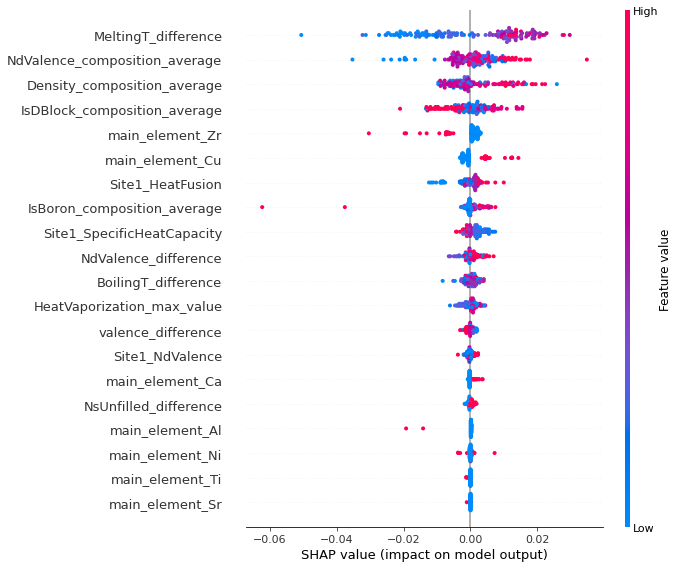

In [120]:
# summary plot
shap.summary_plot(shap_values, X_test)

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 16px">
            Признаки расположены по степени их важности по оси OY, по оси OX находится значение Шепли.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 16px">
            Цветом обозначены значения соответствующего признака: красный - высокие, синий - низкие.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 16px">
            Вывод по важным признакам представлен ниже.
    </body>
</html>

# Вывод по важным признакам

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 16px">
            В разделе EDA было предположение о значимом влиянии таких параметров, как: main_element, NdValence, Density_composition_average и IsDBlock_composition_averagee.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 16px">
            Топ 5 важных признаков разных алгоритмов:
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 16px">
            Ridge: main_element_Al, IsBoron_composition_average, Site1_SpecificHeatCapacity, main_element_Cu, Density_composition_average.
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 16px">
            DecisionTreeRegressor: MeltingT_difference, IsBoron_composition_average, NdValence_composition_average, main_element_Zr, main_element_Cu. 
        </p>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 16px">
            RandomForest (SHAP): MeltingT_difference, NdValence_composition_average, Density_composition_average, IsDBlock_composition_average, main_element_Zr.
    </body>
</html>

<html>
    <head>
    </head>
    <body>
        <p style = "font-family:Georgia, serif; font-weight:400; font-size: 16px">
            С учетом рассмотрения модели RandomForest как лучшей, посмотрим на топ признаков подробней. Большинство из них совпадает с теми, что были выдвинуты в EDA. За исключением MeltingT_difference. Каких-либо линейных зависимостей между целевой переменной и MeltingT_difference на основании имеющихся данных выявлено не было. Но как известно, если между данными нет линейной связи, это не значит, что они не связаны между собой. К тому же, как описывалось в EDA, приведенная температура стеклования - прежде всего, отношение температуры стеклования к температуре плавления.
    </body>
</html>